In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('../data/laptop_price.csv', encoding='ISO-8859-1')

oe = OrdinalEncoder()

pd.set_option('display.max_rows', 1000)

df = df.drop(columns= ["laptop_ID", "Product"])
df['Weight'] = df['Weight'].str.rstrip("kg")
df['Ram'] = df['Ram'].str.rstrip('GB')

df[['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']] = oe.fit_transform(df[['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']])

X = df.drop(columns= "Price_euros")
y = df['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE):  {mae:.2f} €")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} €")
print(f"R²:   {r2:.4f}")

Mean Absolute Error (MAE):  183.23 €
Root Mean Squared Error (RMSE): 296.78 €
R²:   0.8266


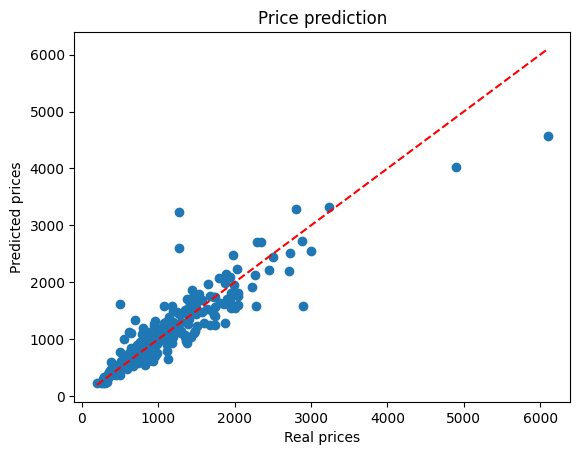

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real prices")
plt.ylabel("Predicted prices")
plt.title("Price prediction")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.savefig('../results/PricePrediction.jpg', format='jpg', dpi=300)
plt.show()